## Day 08 - AIWC

# **DNA Sequence Classification Using Machine Learning**
## Identifying Promoter and Non-Promoter Sequences

### **Overview**
This notebook explores the application of machine learning techniques to classify DNA sequences as **promoters** or **non-promoters**. Using a dataset from the **UCI Machine Learning Repository**, we preprocess DNA sequences, convert them into numerical data, and train multiple classification algorithms.

### **Objectives**
- Load and preprocess a DNA sequence dataset.
- Convert categorical nucleotide sequences into numerical format.
- Train and evaluate multiple machine learning models.
- Compare their performance to determine the best classifier.

### **Why It Matters**
Understanding promoter sequences is crucial in genetics and bioinformatics, as they **control gene expression**. By automating this classification with machine learning, we can enhance research in **genomics, drug discovery, and disease diagnostics**.

---

## Introduction to DNA Classifier

### Getting the data

In [24]:
# Import libraries
import sys
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [25]:
# import the ICU Molecular Biology (Promoter Gene Sequences) Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"

In [26]:
names = ["Class", "id", "Sequence"]

In [27]:
data = pd.read_csv(url, names = names)

In [28]:
data

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


## Exploring data


In [29]:
# Building our Dataset by creating a custom Pandas Dataframe
# Each column in a Dataframe is called a Series. 
classes = data.loc[:,"Class"]

In [30]:
print(classes)

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object


**A promoter is a sequence of DNA needed to turn a gene on or off.** The process of transcription is initiated at the promoter. Usually found the beginning of a gene, the promoter has a binding site for the enzyme used to make a messenger RNA (mRNA) molecule.

Source:[Genome - Genetic Glossary - Promoter](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjr6-2e49PzAhVvkosKHeFuBbsQFnoECA8QAw&url=https%3A%2F%2Fwww.genome.gov%2Fgenetics-glossary%2FPromoter&usg=AOvVaw3g7_kGWqn5M6d6Cgpu8j_X)

According to this dataset:
* "+" means the promoters
* "-" means is anything that is not promoters.



## Generating a DNA sequence

### Data preparation

**A nucleotide is the basic building block of nucleic acids.**

RNA and DNA are polmyers made of long chains of nucleotides. 

A nucleotide consists of a sugar molecule (either ribose in RNA or deoxyriboe in DNA) attached to a phosphate group and a nitrogen-containing base. 

The bases in DNA are adenine (A), cytosine (C), guanine (G), and thymine (T). In RNA, the base uracil (U) takes the place of thymine.

Source: [Genome - Genetic Glossary - Nucleotide](https://www.genome.gov/genetics-glossary/Nucleotide)

---
Sequencing DNA means determining the order of the four chemical building blocks - called "bases" - that make up the DNA molecule.** The sequence tells scientists the kind of genetic information that is carried in a particular DNA segment.**

Source : [DNA Sequencing Fact Sheet](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjm-Pyy79PzAhV3gP0HHcdTA7cQFnoECA8QAw&url=https%3A%2F%2Fwww.genome.gov%2Fabout-genomics%2Ffact-sheets%2FDNA-Sequencing-Fact-Sheet&usg=AOvVaw2GeMB1Qi6PvqKx0tf2ggEY)

In [31]:
# generate list of DNA sequence
sequences = list(data.loc[: , "Sequence"])
dataset = {}

# loop hrough sequences and split into individual nucleotides
for i, seq in enumerate(sequences):

  # split into nucleotides, remove ta characters
  nucleotides = list(seq)
  nucleotides = [x for x in nucleotides if x != '\t']

  # append class assignment
  nucleotides.append(classes[i])

  # add to dataset
  dataset[i] = nucleotides

print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [32]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)

# print the dataframe using tabulate packages in a tab-separated format
dframe

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a
5,g,t,a,t,a,c,g,a,t,a,...,t,g,c,g,c,a,c,c,c,t
6,c,c,g,g,a,a,g,c,a,a,...,a,g,c,t,a,t,t,t,c,t
7,a,c,a,a,t,a,t,a,a,t,...,g,a,g,g,t,g,c,a,t,a
8,a,t,g,t,t,g,g,a,t,t,...,a,c,a,t,g,g,a,c,c,a
9,t,g,a,g,a,g,g,a,a,t,...,c,t,a,a,t,c,a,g,a,t


In [33]:
# transpose the dataframe
df = dframe.transpose()

# print the dataframe using tabulate packages in a tab-separated format
df.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [34]:
# rename the last column as class

df.rename(columns = {57 : "Class"}, inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [35]:
# looks good. Let's start to familiarize ourselves with the dataset so we can pick the most suitable

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [36]:
# Target Column Visualization

def visualize_target(plot, feature):
  total = len(feature)
  for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
  plt.show()

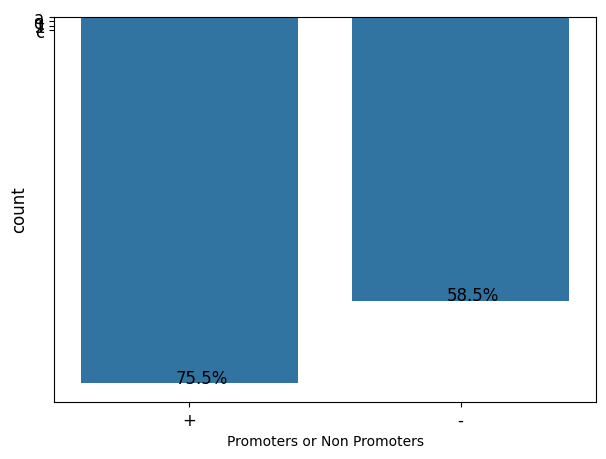

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x="Class", data = df)
plt.xticks(size = 12)
plt.xlabel("Promoters or Non Promoters")
plt.yticks(size = 12)
plt.ylabel("count", size = 12)

visualize_target(ax, df.Class)
plt.savefig("target_histogram")

In [38]:
# describe  doesn't tell us enough information since the attributes are text. Let's record alue counts for each sequence

series = []

for name in df.columns:
  series.append(df[name].value_counts())

info = pd.DataFrame(series)
details = info.transpose()
details

,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
t,38.0,26.0,27.0,26.0,22.0,24.0,30.0,32.0,32.0,28.0,...,21.0,22.0,23.0,33.0,35.0,30.0,23.0,29.0,34.0,NaN
c,27.0,22.0,21.0,30.0,19.0,18.0,21.0,20.0,22.0,22.0,...,36.0,42.0,31.0,32.0,21.0,32.0,29.0,29.0,17.0,NaN
a,26.0,34.0,30.0,22.0,36.0,42.0,38.0,34.0,33.0,36.0,...,23.0,24.0,28.0,27.0,25.0,22.0,26.0,24.0,27.0,NaN
g,15.0,24.0,28.0,28.0,29.0,22.0,17.0,20.0,19.0,20.0,...,26.0,18.0,24.0,14.0,25.0,22.0,28.0,24.0,28.0,NaN
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0


In [39]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch it to numerical data. 
# This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [40]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,True,False,True


## Modeling

### Splitting the dataset into training test and test set

In [41]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'], axis=1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [42]:
# Now that we have our dataset, we can start building algorithms! We'll need to import each algorithm we plan on using from sklearn.  
# We also need to import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#define scoring method
scoring ='accuracy'

#define the model to train
names = ["Nearest Neighbors", "Gaussian Process","Decision Tree","Random Forest",
         "Neural Net", "AdaBoost","Naive Bayes","SVM Linear","SVM RBF","SVM Sigmoid"]
classifiers =[
    KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10,max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]
models =zip(names,classifiers)

# evaluate each model in turn
results = []
names=[]
accuracy = []
for name,model in models:
    kfold = model_selection.KFold(n_splits = 10,shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    
    print(msg)
    model.fit(X_train,y_train)
    predictions= model.predict(X_test)
    print(name)
    print( classification_report(y_test,predictions))

Nearest Neighbors: 0.810714 (0.099808)
Nearest Neighbors
              precision    recall  f1-score   support

       False       1.00      0.65      0.79        17
        True       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Gaussian Process: 0.855357 (0.160605)
Gaussian Process
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        17
        True       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree: 0.683929 (0.113796)
Decision Tree
              precision    recall  f1-score   support

       False       1.00      0.59      0.74        17
        True       0.59      1.00      0.74        10

    accuracy         

In [43]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## **Comparing Machine Learning Models for DNA Classification**

This section presents a comparative analysis of various machine learning algorithms used for DNA sequence classification. The box plot below illustrates the performance of different models based on accuracy scores obtained through cross-validation. 

### **What This Means:**
- The **higher** the median line inside each box, the **better** the model's accuracy.
- A **narrower box** indicates a more **consistent** model with less variation across different test runs.
- **Outliers** (dots) represent occasional high or low performances.
- Models with a **wide spread** may be unstable, while models with **high accuracy and low variance** are preferable.

The goal is to identify the best-performing classifier for distinguishing between promoter and non-promoter DNA sequences.

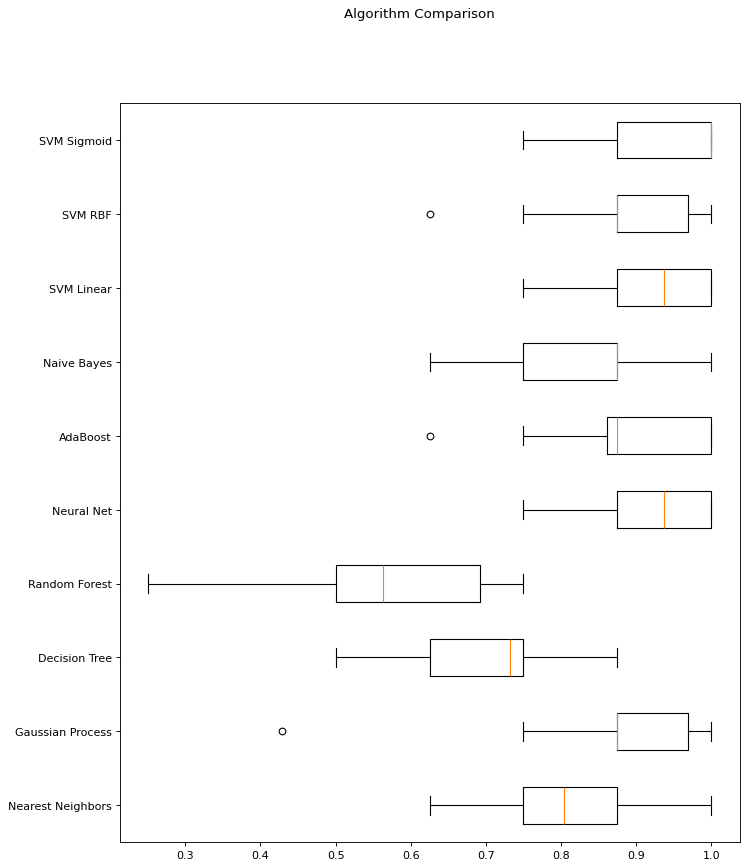

<Figure size 640x480 with 0 Axes>

In [44]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,12), dpi = 80)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.show()
plt.savefig("algorithm_comparison.png")

# **Algorithm Performance Comparison**

The **box plot** below compares the performance of different classification algorithms used in the DNA classification notebook.

## **Key Insights:**

### **1. Algorithms Compared:**
- **Support Vector Machines (SVM)**
  - Sigmoid
  - RBF
  - Linear
- **Naïve Bayes**
- **AdaBoost**
- **Neural Network**
- **Random Forest**
- **Decision Tree**
- **Gaussian Process**
- **K-Nearest Neighbors (KNN)**

### **2. Performance Interpretation:**
- The **higher the median line (middle orange line in each box), the better the accuracy**.
- A **wider spread** indicates more variation in accuracy across different cross-validation folds.
- **Outliers** (dots) show instances where an algorithm performed significantly better or worse than usual.

### **3. Best Performing Models:**
- **SVM (Linear & RBF) and Neural Network** have **high median accuracy** and **less variance**, making them more reliable.
- **Decision Tree & Random Forest** have relatively good accuracy but show some spread, indicating inconsistency.
- **K-Nearest Neighbors & Gaussian Process** have lower median accuracy.

### **4. Least Reliable Models:**
- **Gaussian Process & KNN** have the **largest spread** and lower median accuracy, making them less suitable.

